In [359]:
import warnings
warnings.filterwarnings('ignore')

In [445]:
from pathlib import Path
from pandas.plotting import scatter_matrix
import hvplot.pandas

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [446]:

import os

import requests

import json


from dotenv import load_dotenv

import alpaca_trade_api as tradeapi


import datetime

%matplotlib inline


# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()

np.set_printoptions(precision=5, suppress=True,
                   formatter={'float': lambda x: f'{x:6.3f}'})


Python-dotenv could not parse statement starting at line 29
Python-dotenv could not parse statement starting at line 30


In [562]:
close_prices = pd.read_csv(
    Path('sp500_closefull.csv'),
    index_col=['Date'],
    parse_dates=True,
    infer_datetime_format=True,
    delimiter=','
) 
close_prices_lineup = close_prices[['CSCO','TROW','TPR' ,'DVN', 'MRO']]

In [563]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
# YOUR CODE HERE

data_returns = close_prices_lineup.pct_change().dropna()

display(data_returns.head())
display(data_returns.tail())

,CSCO,TROW,TPR,DVN,MRO
Date,,,,,
2010-01-05,-0.004455,0.011213,0.012118,0.001045,0.000934
2010-01-06,-0.006509,-0.015633,0.019592,-0.003001,0.022091
2010-01-07,0.004505,-0.000739,0.000534,-0.005888,-0.006088
2010-01-08,0.005300,-0.003881,-0.005868,0.001974,0.001531
2010-01-11,-0.002839,0.007050,0.028173,-0.013663,0.000000


,CSCO,TROW,TPR,DVN,MRO
Date,,,,,
2018-12-24,-0.037515,-0.021088,-0.015544,-0.042446,-0.058736
2018-12-26,0.054369,0.055327,0.049226,0.082459,0.119273
2018-12-27,0.010360,0.018516,0.007672,0.008366,0.008469
2018-12-28,-0.003263,0.000329,-0.009956,-0.019214,-0.014696
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:title={'center':'Daily Return Data of The Four Fund Portfolios'}, xlabel='Date'>

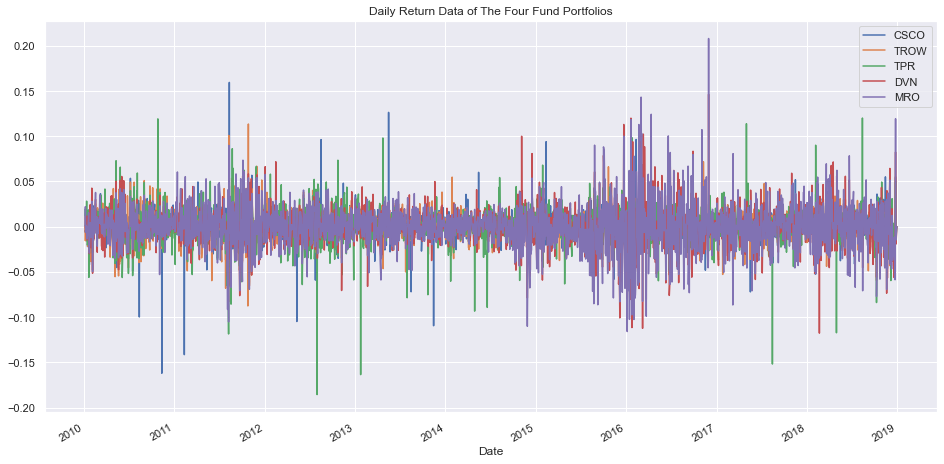

In [564]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
# YOUR CODE HERE

data_returns.plot(figsize=(16,8), title="Daily Return Data of The Four Fund Portfolios")


,CSCO,TROW,TPR,DVN,MRO
Date,,,,,
2018-12-24,1.631430,1.561581,0.889562,0.273998,0.660972
2018-12-26,1.720130,1.647978,0.933352,0.296591,0.739808
2018-12-27,1.737951,1.678493,0.940512,0.299073,0.746073
2018-12-28,1.732280,1.679044,0.931148,0.293326,0.735109
2018-12-31,1.732280,1.679044,0.931148,0.293326,0.735109


<AxesSubplot:title={'center':'Cumulative Returs Whale Funds With S&P 500'}, xlabel='Date'>

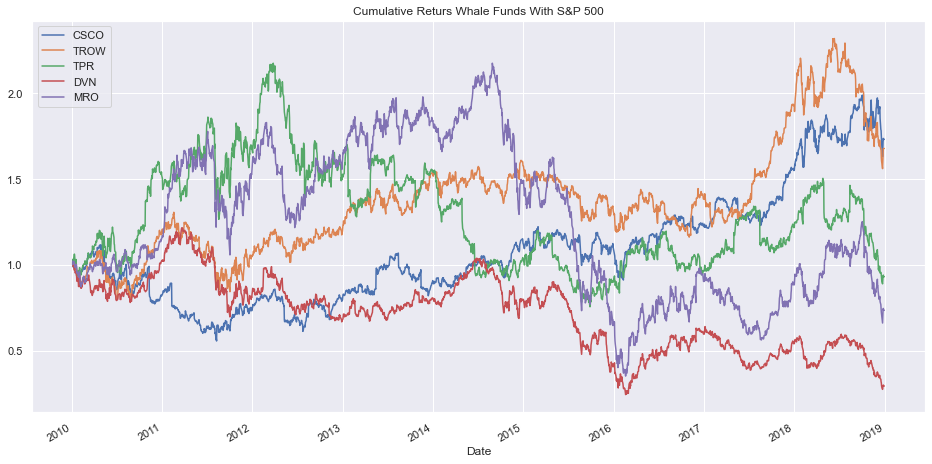

In [565]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
# YOUR CODE HERE


cumusum_returns = (1 + data_returns).cumprod() 

display(cumusum_returns.tail())

cumusum_returns.plot(figsize=(16,8), title='Cumulative Returs Whale Funds With S&P 500')


,CSCO,TROW,TPR,DVN,MRO
Date,,,,,
2010-01-05,0.995545,1.011213,1.012118,1.001045,1.000934
2010-01-06,1.984609,2.006618,2.044065,1.999086,2.023980
2010-01-07,2.978129,3.001287,3.076563,2.991250,3.040797
2010-01-08,3.976914,3.992096,4.103002,3.985373,4.059171
2010-01-11,4.972863,4.989890,5.158358,4.965914,5.077546
...,...,...,...,...,...
2018-12-24,2445.256325,3094.260757,2910.240325,1622.463896,2841.607119
2018-12-26,2446.976455,3095.908735,2911.173676,1622.760487,2842.346927
2018-12-27,2448.714405,3097.587228,2912.114189,1623.059560,2843.093000


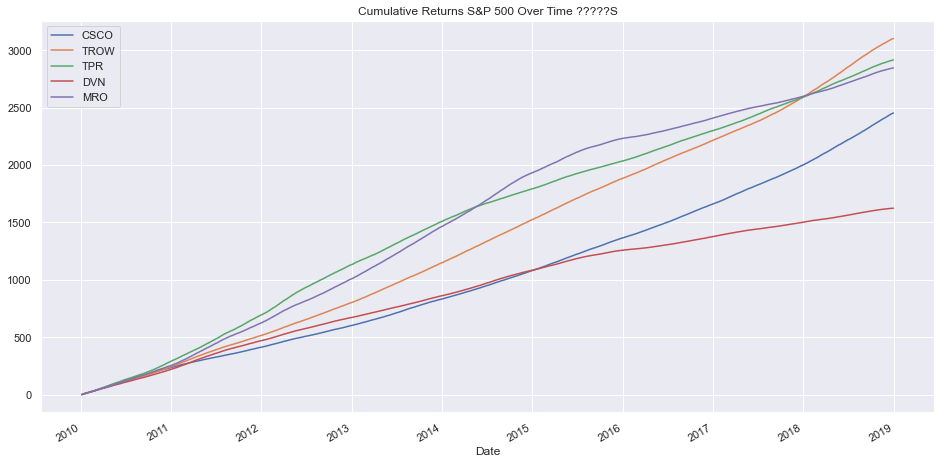

In [566]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

cumusum_returns.cumsum().plot(figsize=(16,8), title='Cumulative Returns S&P 500 Over Time ?????S')


cumusum_returns.cumsum()

<AxesSubplot:title={'center':'Box Plot To Visualize the Volatility'}>

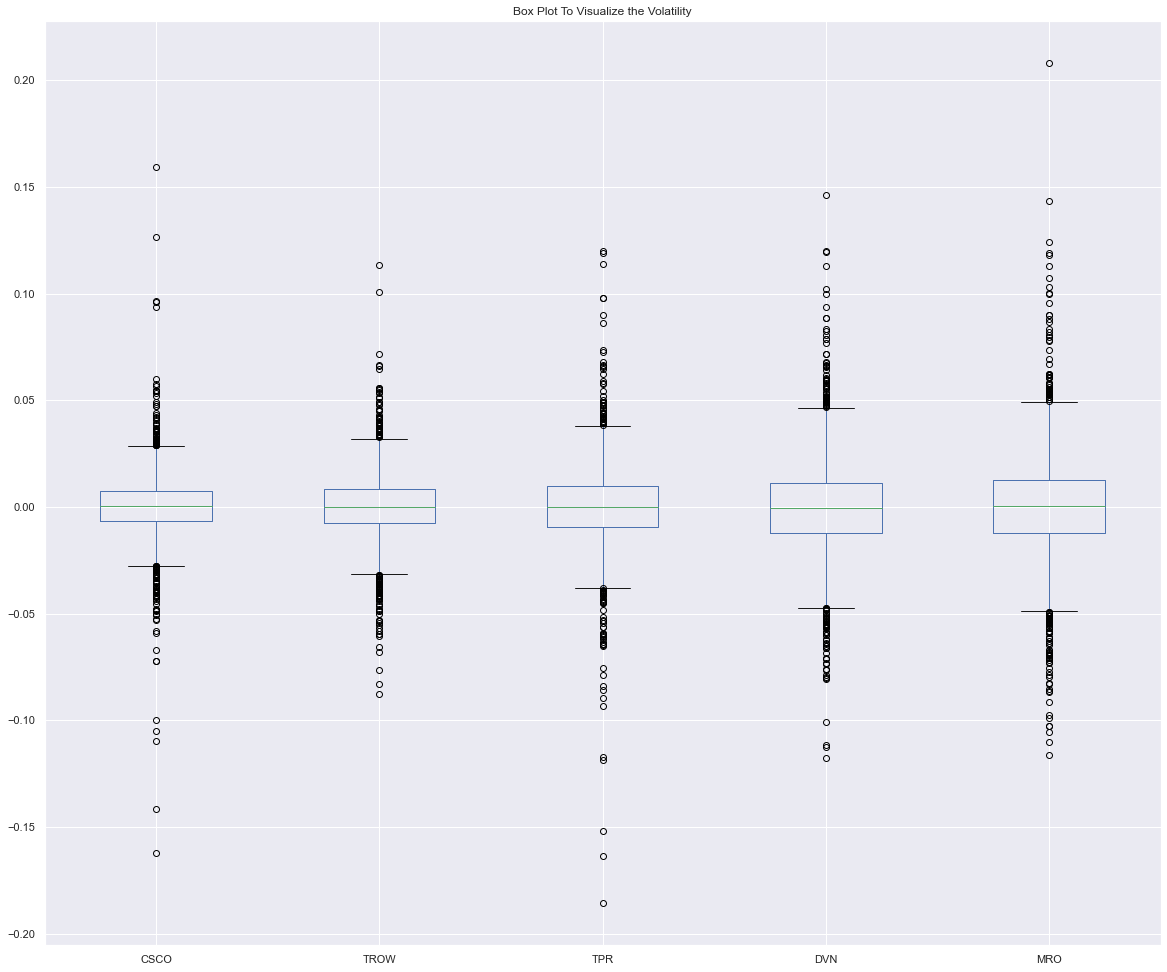

In [567]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

data_returns.plot(kind='box', figsize=(20,17), title="Box Plot To Visualize the Volatility")



In [568]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
# YOUR CODE HERE


return_data_std = data_returns.std()


return_data_std.sort_values()



TROW    0.015793
CSCO    0.015871
TPR     0.019715
DVN     0.022823
MRO     0.025084
dtype: float64

In [569]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
# YOUR CODE HERE


anu_std_return_data = return_data_std * np.sqrt(252)

anu_std_return_data.sort_values()


TROW    0.250703
CSCO    0.251941
TPR     0.312969
DVN     0.362300
MRO     0.398199
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation Window'}, xlabel='Date'>

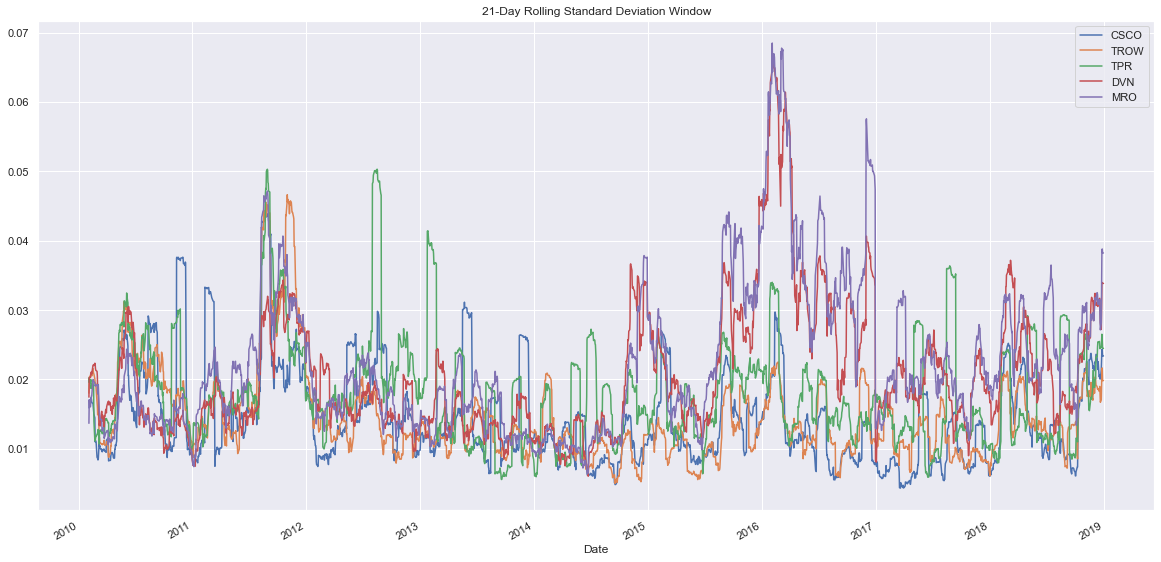

In [570]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

data_returns.rolling(window=21).std().plot(title='21-Day Rolling Standard Deviation Window', figsize=(20,10))



In [571]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
# YOUR CODE HERE

trading_days = 252
yearly_returns = data_returns * trading_days
yearly_returns.sort_values


<bound method DataFrame.sort_values of                  CSCO       TROW        TPR        DVN        MRO
Date                                                             
2010-01-05  -1.122728   2.825720   3.053695   0.263295   0.235437
2010-01-06  -1.640356  -3.939633   4.937151  -0.756175   5.566874
2010-01-07   1.135141  -0.186154   0.134511  -1.483895  -1.534233
2010-01-08   1.335499  -0.978003  -1.478802   0.497570   0.385914
2010-01-11  -0.715325   1.776610   7.099539  -3.442988   0.000000
...               ...        ...        ...        ...        ...
2018-12-24  -9.453762  -5.314133  -3.917115 -10.696489 -14.801486
2018-12-26  13.701108  13.942333  12.404955  20.779785  30.056877
2018-12-27   2.610776   4.666135   1.933330   2.108328   2.134084
2018-12-28  -0.822182   0.082792  -2.508932  -4.841927  -3.703290
2018-12-31   0.000000   0.000000   0.000000   0.000000   0.000000

[2269 rows x 5 columns]>

In [572]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE

portfolio_sharpe_ratio_annual = (data_returns.mean() * 252) / (data_returns.std() * np.sqrt(252))
portfolio_sharpe_ratio_annual

CSCO    0.368940
TROW    0.354943
TPR     0.133016
DVN    -0.195010
MRO     0.112583
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios For The Funds & S&P500'}>

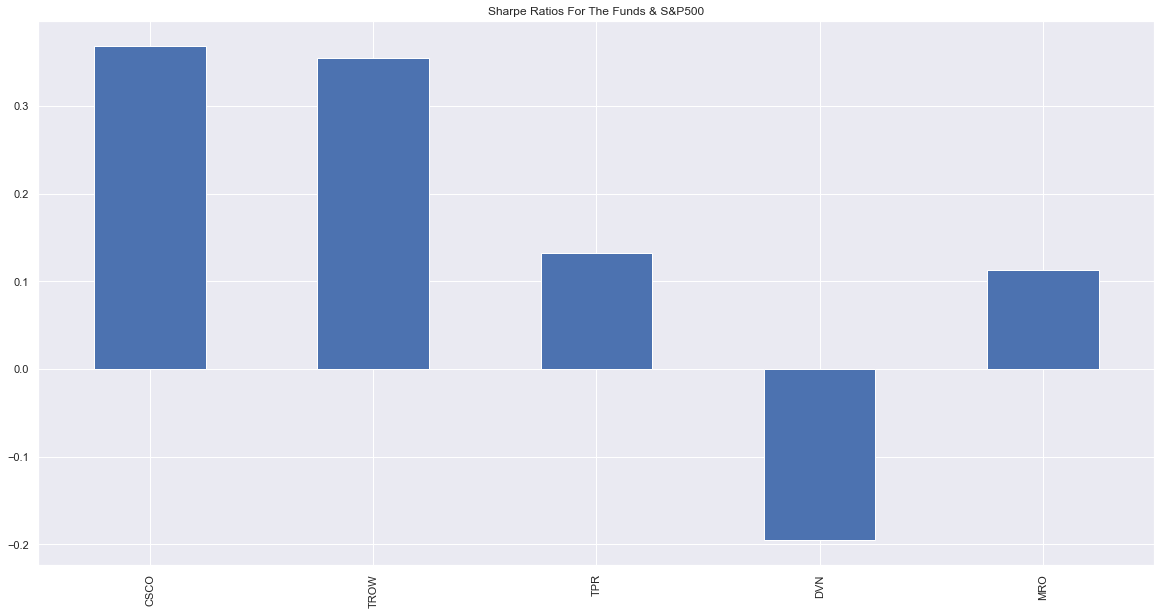

In [573]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

portfolio_sharpe_ratio_annual.plot(kind='bar', figsize=(20, 10), title="Sharpe Ratios For The Funds & S&P500")



In [574]:
trow_returns = data_returns[['TROW']]

dvn_returns = data_returns[['DVN']]

In [575]:
"""
# Trading Strategy

Simple Moving Average.
"""

'\n# Trading Strategy\n\nSimple Moving Average.\n'

In [576]:
SMA1 = 52 # Shorter SMA
SMA2 = 208 # Longer SMA

In [577]:
trow_returns['SMA1'] = trow_returns['TROW'].rolling(SMA1).mean() # Shorter SMA
trow_returns['SMA2'] = trow_returns['TROW'].rolling(SMA2).mean() # Longer SMA

In [578]:
dvn_returns['SMA1'] = dvn_returns['DVN'].rolling(SMA1).mean() # Shorter SMA
dvn_returns['SMA2'] = dvn_returns['DVN'].rolling(SMA2).mean() # Longer SMA

<AxesSubplot:xlabel='Date'>

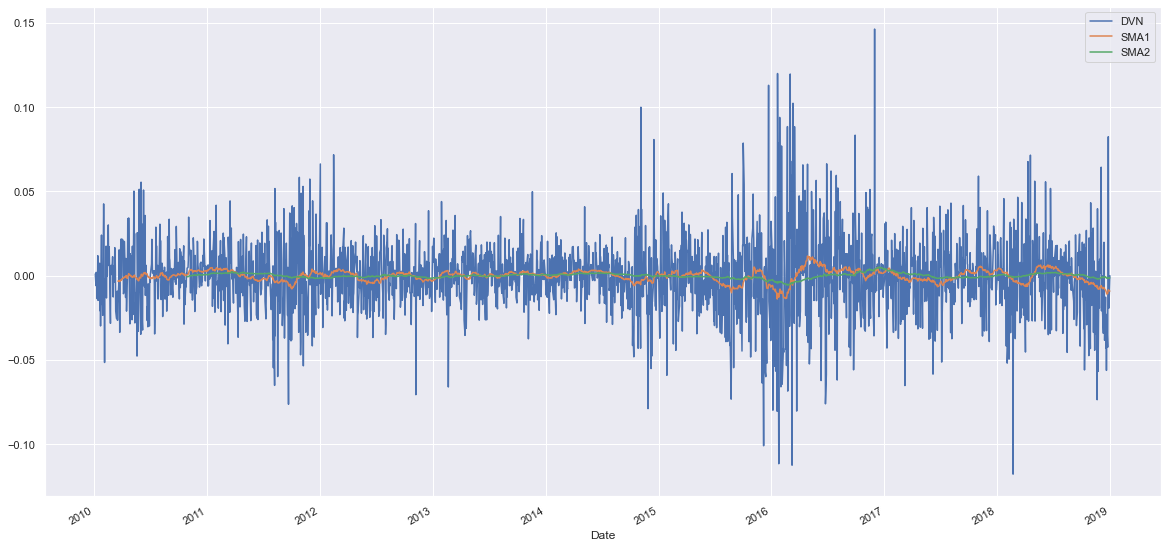

In [579]:
dvn_returns.plot(figsize=(20, 10))


<AxesSubplot:xlabel='Date'>

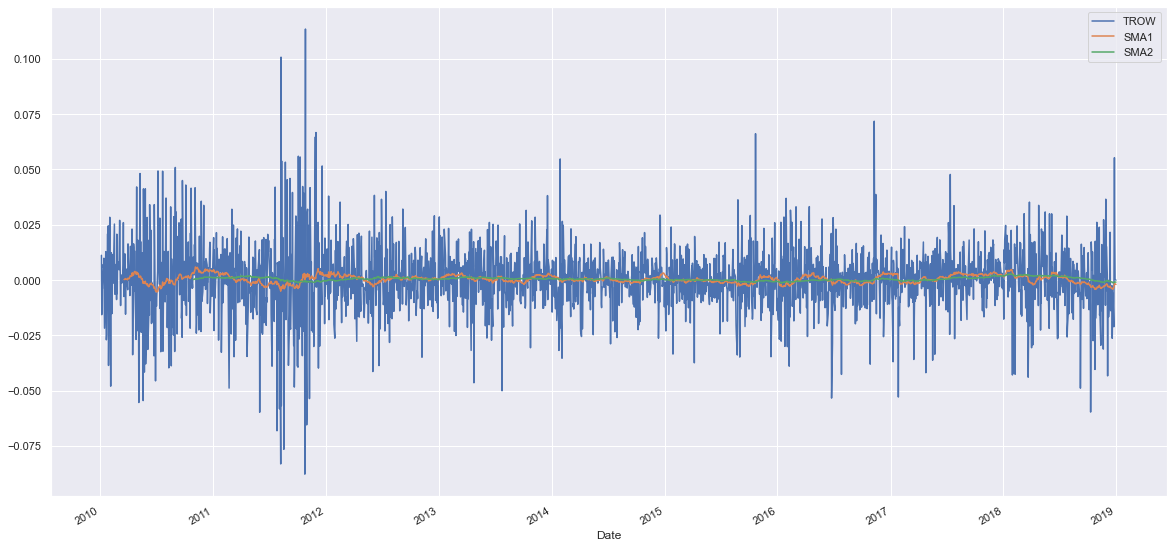

In [580]:
trow_returns.plot(figsize=(20, 10))

In [581]:
dvn_returns.dropna(inplace=True)

In [582]:
"""
Go long(=+1)when the shorter SMA is above the longer SMA

Go short(=+1)when the shorter SMA is below the longer SMA
"""
dvn_returns['Position'] = np.where(dvn_returns['SMA1'] > dvn_returns['SMA2'], 1, -1)


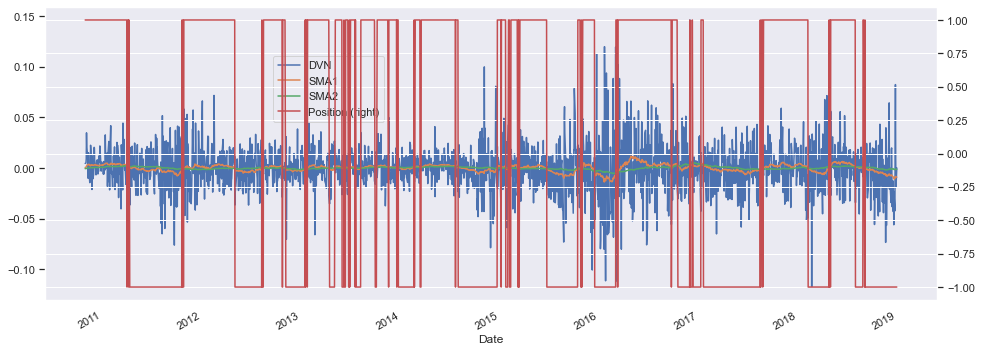

In [583]:
ax = dvn_returns.plot(secondary_y='Position', figsize=(16,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [586]:
"""
Vectorized Backtesting:

Vectorized backtesting is implemented as follows. First, the log returns are caculated.
Then the positionings, represented as +1 or -1, are multiplied by the relavant log return.
This simple calculation is possible since a long position earns the return of the stock and short the negative.
Finally the log returns for the stock and the algo trading strategy based on SMAs need to be added up
and the exponential function applied to arrive at the performance values.
"""
dvn_returns['Returns'] = np.log(dvn_returns['DVN'] / dvn_returns['DVN'].shift(1))

dvn_returns['Strategy'] = dvn_returns['Position'].shift(1) * dvn_returns['Returns']

dvn_returns.dropna(inplace=True)

dvn_returns = dvn_returns[dvn_returns.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]  # .astype(np.float64) ?

dvn_returns['AnSTD'] = dvn_returns['DVN'].std() * np.sqrt(252)

np.exp(dvn_returns[['Returns','Strategy']].sum())


Returns     24424.702485
Strategy        0.000002
dtype: float64

In [590]:
from itertools import product 
sma1 = range(20, 61, 4)
sma2 = range(100, 281, 10)

In [600]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(trow_returns['TROW'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(trow_returns['TROW'] / trow_returns['TROW'].shift(1))
    data['SMA1'] = trow_returns['TROW'].rolling(SMA1).mean() # Shorter SMA
    data['SMA2'] = trow_returns['TROW'].rolling(SMA2).mean() # Longer SMA
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
    {'SMA1': SMA1, 'SMA2': SMA2,
    'MARKET': perf['Returns'],
    'STRATEDY': perf['Strategy'],
    'OUT': perf['Strategy'] - perf['Returns']},
    index=[0]), ignore_index=True)



    

In [389]:
close_prices_lineup = close_prices[['CSCO','UAL','TROW','ISRG' ,'PRGO','TPR' ,'DVN', 'MRO']]

In [674]:
"""
Linear OLS Regression 
This section applies linear OLS regression to predict the direction of the market movements based on historical log returns.
To keep things simple, only two features are used. The first feature (lag_1) represents the log returns of the financial time series lagged by one day.
Second feature lags the log returns by two days. Log returns in contrast to prices - are stationary in general,
which often is a necessary condition for the application of statistical and ML algo.
"""

raw = close_prices_lineup
symbol2 = 'MRO'

In [675]:
mro_data = pd.DataFrame(raw[symbol2])

In [608]:
reg_data['Returns'] = np.log(reg_data / reg_data.shift(1))

reg_data.dropna(inplace=True)

In [609]:
reg_data['direction'] = np.sign(reg_data['Returns']).astype(int)

<AxesSubplot:>

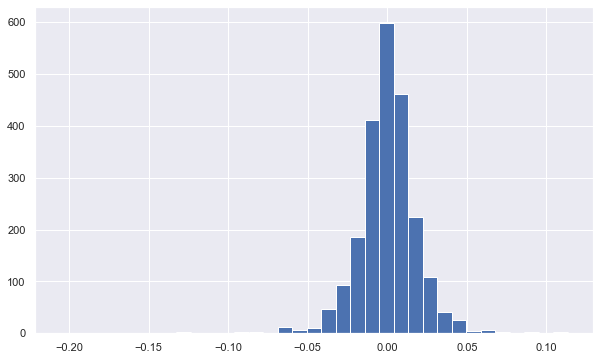

In [610]:
reg_data['Returns'].hist(bins=35,figsize=(10, 6))

In [614]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['Returns'].shift(lag)
        cols.append(col)
        
        
create_lags(reg_data)

In [616]:
reg_data.dropna(inplace=True)

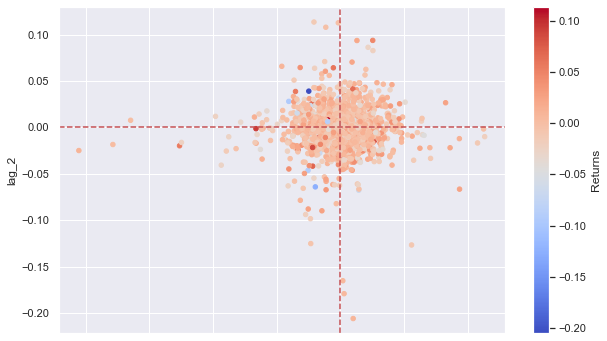

In [621]:
reg_data.plot.scatter(x='lag_1', y='lag_2', c='Returns', cmap='coolwarm', figsize=(10,6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

In [635]:
"""
# Regression

linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movements based on the features,
and to backtest a trading strategy based on the predictions. Two approaches are avaliable:
using the log returns or only the direction data as the dependent variable during the regression. 
Predicitons are transformed to either +1, -1 to only work with the direction of the prediction:
"""

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [636]:
reg_data['pos_ols_1'] = model.fit(reg_data[cols],
                                 reg_data['Returns']).predict(reg_data[cols]) # the regression is implemented on the log returns directly

In [637]:
reg_data['pos_ols_2'] = model.fit(reg_data[cols],
                                 reg_data['direction']).predict(reg_data[cols]) # on the direction data which is of primary interest

In [638]:
reg_data[['pos_ols_1','pos_ols_2']] = np.where(reg_data[['pos_ols_1','pos_ols_2']] > 0, 1, -1) # The real_valued predicitions are transformed to directional values

In [639]:
reg_data[['pos_ols_1']].value_counts() # The two approaches yield diffrent directional predictions in general

pos_ols_1
-1           1232
 1           1022
dtype: int64

In [640]:
reg_data[['pos_ols_2']].value_counts() # The two approaches yield diffrent directional predictions in general

pos_ols_2
 1           1506
-1            748
dtype: int64

In [641]:
(reg_data['pos_ols_1'].diff() != 0).sum() # However, both lead to a relatively large number of trades over time

1456

In [642]:
(reg_data['pos_ols_2'].diff() != 0).sum() # However, both lead to a relatively large number of trades over time

1200

In [643]:
"""
With directional predictions, vectorized backtesting can be applied to jude the performance of the resulting trading strategies. 
At this stage, we have a few assumptions, 'zero transaction costs' and the usage of the same data set for both training and testing. 
"""

reg_data['strat_ols_1'] = reg_data['pos_ols_1'] * reg_data['Returns']

reg_data['strat_ols_2'] = reg_data['pos_ols_2'] * reg_data['Returns']

In [645]:
reg_data[['Returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

Returns        0.879192
strat_ols_1    1.882993
strat_ols_2    9.033989
dtype: float64

In [646]:
(reg_data['direction'] == reg_data['pos_ols_1']).value_counts() 

True     1139
False    1115
dtype: int64

In [647]:
(reg_data['direction'] == reg_data['pos_ols_2']).value_counts() 

True     1170
False    1084
dtype: int64

<AxesSubplot:xlabel='Date'>

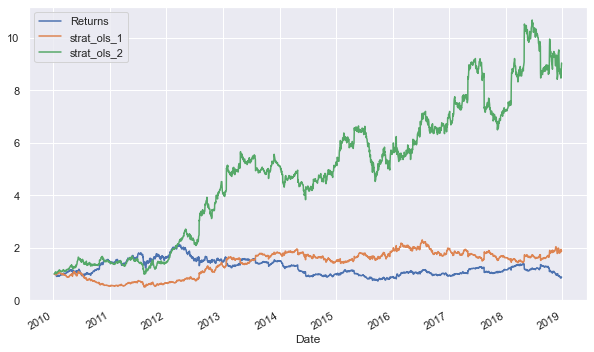

In [648]:
reg_data[['Returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [653]:
"""
# Clustering 
Here we apply k-means clustering to financial time series data to automatically come up with clusters that are used to formulate a trading strategy.
The algo identefies two clusters of feature values that predict either an upward or downward movement.

The following code applies the kmeans algo to the twwo features as used before.
ploting the two clusters
"""
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)


In [654]:
model.fit(reg_data[cols])

KMeans(n_clusters=2, random_state=0)

In [655]:
reg_data['pos_clust'] = model.predict(reg_data[cols])

In [656]:
reg_data['pos_clust'] = np.where(reg_data['pos_clust'] == 1, -1, 1)

In [657]:
reg_data['pos_clust'].values

array([-1, -1,  1, ...,  1, -1, -1])

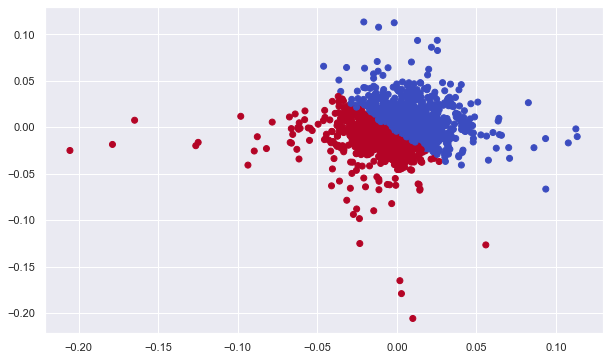

In [659]:
plt.figure(figsize=(10, 6))
plt.scatter(reg_data[cols].iloc[:, 0], reg_data[cols].iloc[:, 1],
           c=reg_data['pos_clust'], cmap='coolwarm')

In [671]:
"""
Frequency Approach 
Beyond more sophisticated algo and techniques , one might come up with the idea of using a frequancy approach to predict
directional movements in fin markets. On might transformm two realworld features into binary ones
and asses the probability of an upward and downward movement, respectively, from the historical observation os such movements given
the four possible combinations for the two binary features.
"""

def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        cols_bin = col + '_bin'
        data[cols_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(cols_bin)